In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X, y = make_regression(n_samples=4, n_features=1, n_targets=1, noise=80, random_state=13)

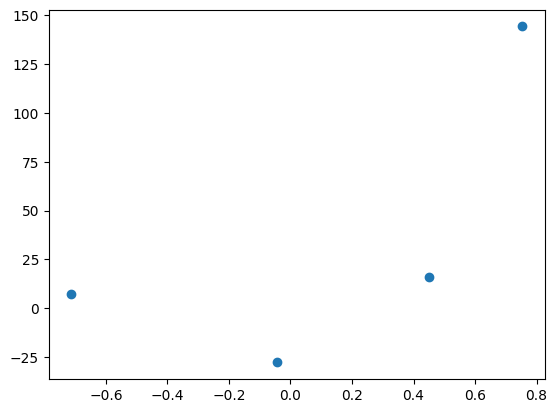

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [4]:
# Let's Apply OLS
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [5]:
# is basically m value
reg.coef_

array([78.35063668])

In [7]:
# b value
reg.intercept_

26.15963284313262

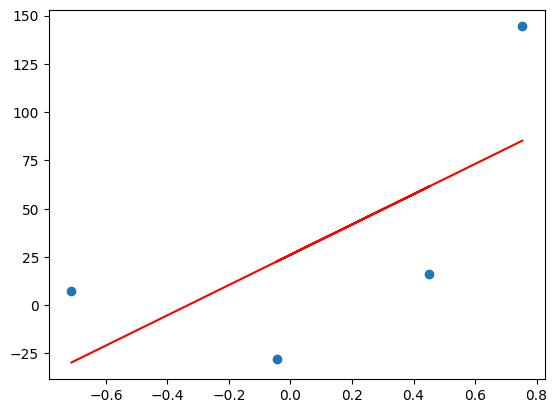

In [8]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')

In [10]:
# Let's apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0

y_pred = ((78.35 * X) + 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

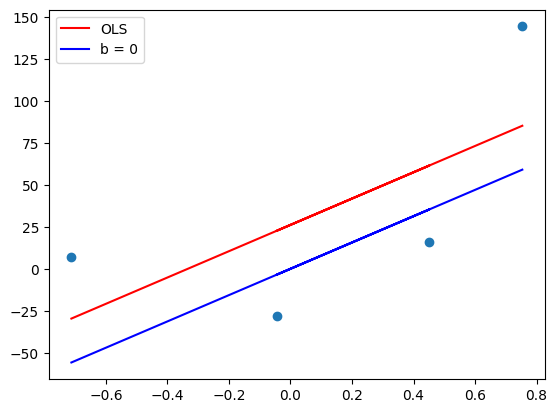

In [11]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='blue', label='b = 0')
plt.legend()
plt.show()

In [15]:
print(X)

[[-0.71239066]
 [ 0.45181234]
 [-0.04450308]
 [ 0.75376638]]


In [14]:
# 2D to 1D
X.ravel(), X.ravel().shape

(array([-0.71239066,  0.45181234, -0.04450308,  0.75376638]), (4,))

In [16]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-209.27763408209216

In [17]:
# Let's take learning rate = 0.1
lr = 0.1

step_size = loss_slope * lr
step_size

-20.927763408209216

In [18]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

In [19]:
y_pred1 = ((78.35 * X) + b).reshape(4)
print(y_pred1)

[-34.88804496  56.32726015  17.44094722  79.98535918]


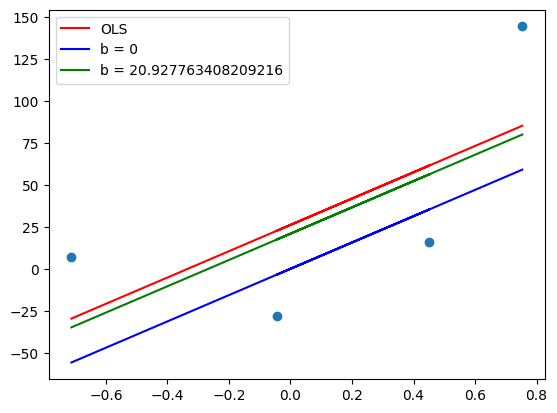

In [20]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='blue', label='b = 0')
plt.plot(X, y_pred1, color='green', label=f'b = {b}')
plt.legend()
plt.show()

In [21]:
# Iteration 2
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-41.85552681641843

In [22]:
step_size = loss_slope * lr
step_size

-4.185552681641844

In [23]:
b = b - step_size
b

25.11331608985106

In [24]:
y_pred2 = ((78.35 * X) + b).reshape(4)
y_pred2

array([-30.70249228,  60.51281283,  21.6264999 ,  84.17091186])

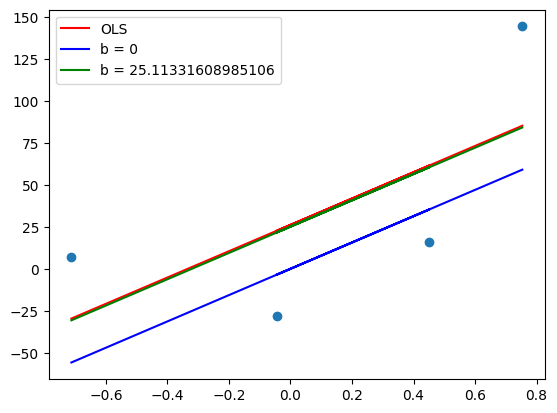

In [26]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='blue', label='b = 0')
plt.plot(X, y_pred2, color='green', label=f'b = {b}')
plt.legend()
plt.show()

In [27]:
# Iteration 3
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-8.371105363283675

In [28]:
step_size = loss_slope * lr
step_size

-0.8371105363283675

In [29]:
b = b - step_size
b

25.95042662617943

In [30]:
y_pred3 = ((78.35 * X) + b).reshape(4)
y_pred3

array([-29.86538175,  61.34992337,  22.46361044,  85.00802239])

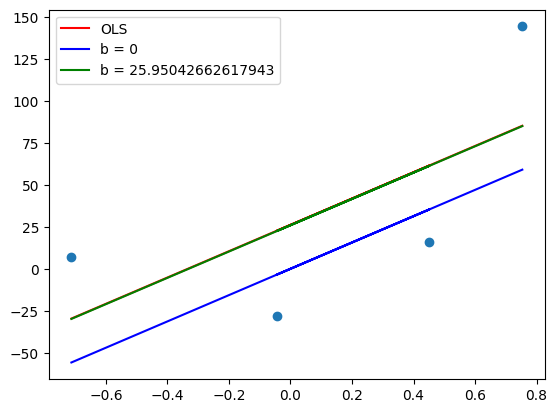

In [31]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='blue', label='b = 0')
plt.plot(X, y_pred3, color='green', label=f'b = {b}')
plt.legend()
plt.show()

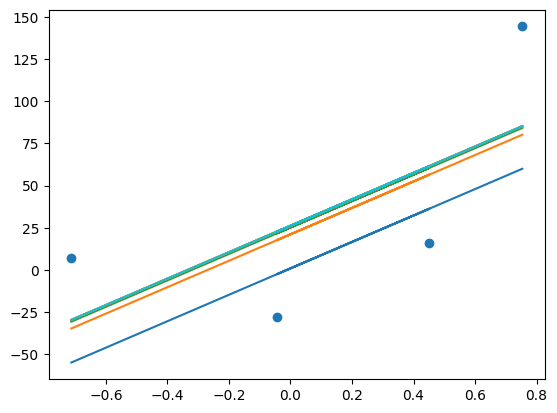

In [32]:
m = 78.35
b = -100
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X, y_pred)

plt.scatter(X, y)

## Making GD Regressor class

In [33]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

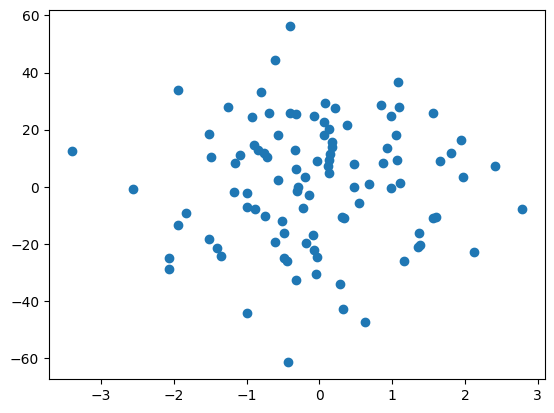

In [34]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)
plt.scatter(X, y)

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [36]:
lr.coef_

array([0.61085372])

In [37]:
lr.intercept_

1.2066890544864841

In [44]:
m = 29.19


class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 29.19
        self.b = 150
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # Calculate the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope, self.b)
        print(self.b)


gd = GDRegressor(0.001, 100)
gd.fit(X, y)

29413.818623555737 120.58618137644426
23531.054898844584 97.05512647759967
18824.843919075665 78.23028255852401
15059.875135260536 63.17040742326347
12047.900108208427 51.122507315055046
9638.320086566742 41.4841872284883
7710.656069253395 33.773531159234906
6168.524855402715 27.60500630383219
4934.819884322173 22.670186419510017
3947.855907457737 18.72233051205228
3158.28472596619 15.56404578608609
2526.627780772953 13.037418005313137
2021.3022246183616 11.016115780694776
1617.0417796946892 9.399074001000086
1293.6334237557514 8.105440577244334
1034.906739004601 7.070533838239733
827.925391203681 6.2426084470360514
662.3403129629447 5.580268134073107
529.8722503703558 5.050395883702751
423.8978002962843 4.626498083406466
339.1182402370277 4.287379843169439
271.2945921896221 4.016085250979817
217.03567375169754 3.799049577228119
173.62853900135792 3.625421038226761
138.90283120108649 3.4865182070256746
111.12226496086923 3.3753959420648054
88.89781196869538 3.2864981300961102
71.118249

## Find m and b

In [48]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

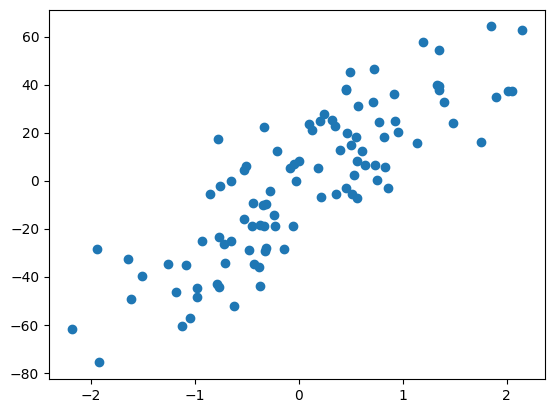

In [46]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
plt.scatter(X, y)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [60]:
# np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

y_pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6345158782661012

In [62]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # Calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m, self.b)
        # print(self.b)
    
    def predict(self,X):
        return self.m * X.ravel() + self.b

In [63]:
gd = GDRegressor(0.001, 50)
gd.fit(X_train, y_train)

28.159367347119066 -2.3004574196824854


In [64]:
gd.predict(X_test)

array([ 21.09732023,  18.02962184,  18.23238093,  -8.13929374,
        15.71827044,  58.2529665 , -15.07783741, -11.37125581,
       -15.85557195,  -8.84542293, -23.62986105,  14.77224759,
        12.68984073, -23.94450805, -22.36092777, -16.71707058,
        24.53064978, -17.03243073,  -3.92053306, -12.06068528])

In [65]:
# np.mean(cross_val_score(gd, X, y, scoring='r2'))
y_pred = gd.predict(X_test)

r2_score(y_test, y_pred)

0.6343842836315579